In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [0]:
from fastai.vision import *
# import jdc

In [3]:
import torch
print(torch.__version__)

1.5.0+cu101


In [0]:
 !pip install "torch==1.4" "torchvision==0.5.0" jdc # for error fix

In [3]:
import torch
print(torch.__version__)

1.4.0


In [0]:
path = Path(base_dir+'data/COVID-19-Dataset/')
# dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

In [43]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/COVID-19-Dataset/COVID'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/COVID-19-Dataset/PNEUMONIA'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/COVID-19-Dataset/NORMAL'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/COVID-19-Dataset/models'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/COVID-19-Dataset/RANDOM'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/COVID-19-Dataset/4class-Production-Model')]

In [0]:
np.random.seed(42)     
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
         size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
data.classes

['COVID', 'NORMAL', 'PNEUMONIA', 'RANDOM']

In [9]:
learn = cnn_learner(data, models.resnet18,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [10]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.716298,0.887937,0.247126,01:16
1,0.943396,0.311261,0.063218,00:10
2,0.605852,0.114608,0.028736,00:06
3,0.426165,0.140472,0.034483,00:06
4,0.318538,0.110733,0.028736,00:07
5,0.240775,0.104162,0.034483,00:06
6,0.191646,0.103076,0.028736,00:06
7,0.154220,0.106495,0.034483,00:06


In [0]:
learn.save('Res18-8Epocs-4classes')

In [0]:
# learn.load('022Res50-8Epocs')

In [0]:
# learn.validate(data.valid_dl, callbacks = None, metrics= [accuracy])

[2.2130501, tensor(0.3790)]

In [16]:
learn.lr_find(start_lr=1e-6, end_lr=1e-3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


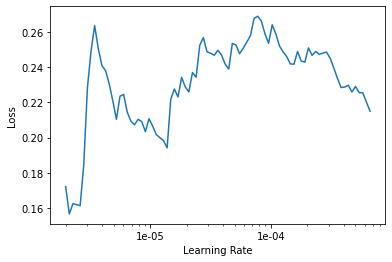

In [17]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(4, max_lr=slice(6e-5,6e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.249613,0.216676,0.028736,00:06
1,0.234668,0.185171,0.028736,00:06
2,0.203033,0.169803,0.034483,00:07
3,0.166143,0.173358,0.028736,00:07


In [0]:
learn.save('resnet18-4epochs-finetuned-4classes')

## Interpretation

In [0]:
# learn.load('vg19-stage-2-best-059')

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

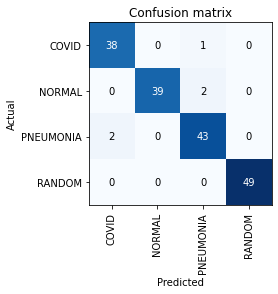

In [21]:
interp.plot_confusion_matrix()

In [0]:
# learn_cln = cnn_learner(data, models.vgg19_bn, metrics=error_rate)

# learn_cln.load('vg19-stage-2-best-059');

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth


In [0]:
learn.export("exported-4classes")

In [0]:
defaults.device = torch.device('cpu')

In [24]:
data.classes

['COVID', 'NORMAL', 'PNEUMONIA', 'RANDOM']

In [0]:
learn = load_learner(path,file='exported-4classes')

In [0]:
TestImgPath = Path(base_dir+'data/Test-Files')

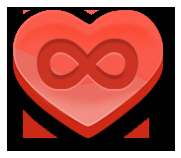

In [27]:
p1 = open_image(TestImgPath/'p1.jpeg')
p2 = open_image(TestImgPath/'p2.jpeg')
p3 = open_image(TestImgPath/'p3.jpeg')
c1 = open_image(TestImgPath/'c1.jpeg')
c2 = open_image(TestImgPath/'c2.jpg')
c3 = open_image(TestImgPath/'c3.jpeg')
r1 = open_image(TestImgPath/'r1.jpeg')
r2 = open_image(TestImgPath/'r2.jpeg')
r3 = open_image(TestImgPath/'r3.jpeg')
other = open_image(TestImgPath/'d.png')
show_image(other)
# show_image(img), show_image(img2), show_image(img3)
# show_image(img4), show_image(img5), show_image(img6)
# show_image(img7), show_image(img8), show_image(img9)


In [29]:
data.classes

['COVID', 'NORMAL', 'PNEUMONIA', 'RANDOM']

In [42]:
pred_class,pred_idx,outputs = learn.predict(p3)
pred_class,pred_idx,outputs

(Category tensor(2),
 tensor(2),
 tensor([2.8951e-10, 1.4012e-10, 1.0000e+00, 1.1180e-15]))

In [0]:
9.9991e-01, 3.5350e-07, 9.3619e-05

(0.99991, 3.535e-07, 9.3619e-05)

In [0]:
len(outputs), outputs.shape

(3, torch.Size([3]))

In [0]:
outputList = outputs.tolist()

In [0]:
for a in outputList:
  print(a),print( "{:.16f}".format(float(a)))

0.9999910593032837
0.9999910593032837
8.96449728315929e-06
0.0000089644972832
1.8604465190641406e-10
0.0000000001860447


In [0]:
doc(learn.predict)

In [0]:
pred_class

Category tensor(2)

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(1, max_lr=0.5)

### Learning rate (LR) too low

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [0]:
learn.fit_one_cycle(5, max_lr=1e-5)

In [0]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [0]:
learn.fit_one_cycle(1)

### Too many epochs

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [0]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))